# Authors
# ----------------------------------------

## Kiara Gabriel             -    2161334

## Phola Bavuma          -    1848739

## Shravan Singh         -    2173638

## Arneev Singh          -    2180393

# ----------------------------------------

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import copy as copy
import random as random
import multiprocessing as mp
import time as time
from multiprocessing import Pool
from functools import partial
import inspect

In [2]:
#Constants
tabSpace = 30
maxIterations = 1000

#NOTE: You can adjust this value to display the amount of floating points
floatingDigits = 5

In [3]:
#Helper Function - Prints Question
def printQues(questionNumber):
    ans = "Question " + questionNumber 
    
    hashes = ""
    for i in range(len(ans)):
        hashes += '='
    
    print(ans)
    print(hashes)

In [4]:
#Question 3(a)

printQues("3(a)")

imageIn = plt.imread("peppers.bmp")

height = len(imageIn)
width = len(imageIn[0])

imageMat = []
for x in imageIn:
    for y in x:
        imageMat.append(y)

Question 3(a)


In [5]:
def getRandomRGB():
    lst = []
    for i in range(3):
        lst.append(random.randint(0,255))
        
    return lst

In [6]:
def euci(p1,p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2 )

In [7]:
def clustersEqual(oldClusters, newClusters):
    if (len(oldClusters) != len(newClusters)):
        return False
    
    numbClusters = len(oldClusters)
    
    for idx in range(len(oldClusters)):
        if (len(oldClusters[idx]) != len(newClusters[idx])):
            return False
    
    return True

In [8]:
#Question 3(b) & 3(c)

def kMeans(k,oldInputData):
    inputData = copy.deepcopy(oldInputData)
    
    centroids = []
    
    oldClusters = []
    clusters = []
    
    for i in range(k):
        centroids.append(getRandomRGB())
        clusters.append([])
    
    iteration = 0
    firstIteration = True
    while (not clustersEqual(oldClusters, clusters) or firstIteration):
        iteration += 1
        firstIteration = False
        
        oldClusters = clusters
        
        clusters = []
        for i in range(k):
            clusters.append([])
        
        for rgb in inputData:

            minDistance = math.inf
            minIndex = 0

            #Finding the min centroid
            for centroidIndex, centroid in enumerate(centroids):
                distance = euci(centroid,rgb)

                if (distance < minDistance):
                    minDistance = distance
                    minIndex = centroidIndex

            #Assign to cluster
            clusters[minIndex].append(rgb)
            
        

        for clusterIndex, cluster in enumerate(clusters):
            lengthCluster = len(cluster)
            if (lengthCluster == 0):
                continue
                
            #Getting average rgb
            avgR = 0
            avgG = 0
            avgB = 0

            for rgb in cluster:
                avgR += rgb[0]
                avgG += rgb[1]
                avgB += rgb[2]

            
            avgR /= lengthCluster
            avgG /= lengthCluster
            avgB /= lengthCluster

            #Assigning centroid to the new average center
            centroids[clusterIndex][0] = avgR 
            centroids[clusterIndex][1] = avgG
            centroids[clusterIndex][2] = avgB

    
    #===========================================================
    #Getting output data
    outputData = copy.deepcopy(inputData) 
    
    for rgbIndex, rgb in enumerate(outputData):
        
        minDistance = math.inf
        minIndex = 0
        
        #Finding the min centroid
        for centroidIndex, centroid in enumerate(centroids):
            distance = euci(centroid,rgb)
            
            if (distance < minDistance):
                minDistance = distance
                minIndex = centroidIndex
        
        minCentroid = centroids[minIndex]
        
        #Setting data to closest centroid
        outputData[rgbIndex][0] = minCentroid[0]
        outputData[rgbIndex][1] = minCentroid[1]
        outputData[rgbIndex][2] = minCentroid[2]
        
    #Converting to x and y coords
    newMat = []
    lengthList = len(outputData)
    
    for i in range(lengthList // height):
        newMat.append([])
    
    for rgbIndex, rgb in enumerate(outputData):
        newMat[rgbIndex // height].append(outputData[rgbIndex])
            
    print("Iterations:", iteration)      
    return newMat

Question 3(b) & 3(c)
Iterations: 11


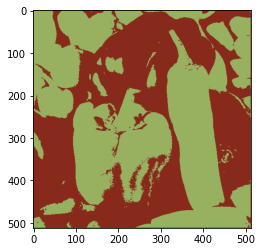

In [9]:
printQues("3(b) & 3(c)")
newData = kMeans(2,imageMat)

plt.imshow(newData)

Question 3(d)
k: 4

Iterations: 45




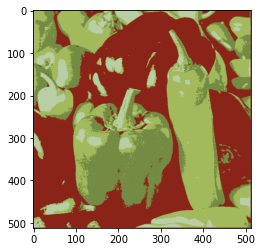

In [10]:
printQues("3(d)")

def ques3d(k, imageMat):
    print("============================")
    print("k:", k)
    print("============================\n")
    newData = kMeans(k,imageMat)

    plt.imshow(newData)
    
    print("\n============================\n")
    
ques3d(4, imageMat)

k: 8

Iterations: 27




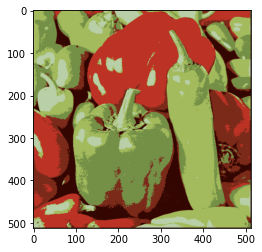

In [11]:
ques3d(8, imageMat)

k: 16

Iterations: 48




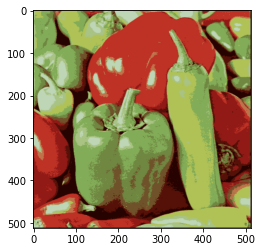

In [12]:
ques3d(16, imageMat)

In [ ]:
ques3d(32, imageMat)

k: 32



In [ ]:
ques3d(64, imageMat)

# Flowers

In [ ]:
imageInNew = plt.imread("flower.bmp")

height = len(imageInNew)
width = len(imageInNew[0])

imageMatNew = []
for x in imageInNew:
    for y in x:
        imageMatNew.append(y)
        

In [ ]:
ques3d(2, imageMatNew)

In [ ]:
ques3d(4, imageMatNew)

In [ ]:
ques3d(8, imageMatNew)

In [ ]:
ques3d(16, imageMatNew)

In [ ]:
ques3d(32, imageMatNew)

# Lena

In [ ]:
imageInNew2 = plt.imread("lena.tif")

height = len(imageInNew2)
width = len(imageInNew2[0])

imageMatNew2 = []
for x in imageInNew2:
    for y in x:
        imageMatNew2.append(y)

In [ ]:
ques3d(2, imageMatNew2)

In [ ]:
ques3d(4, imageMatNew2)

In [ ]:
ques3d(8, imageMatNew2)

In [ ]:
ques3d(16, imageMatNew2)

In [ ]:
ques3d(32, imageMatNew2)